In [3]:
#Financial fraud detection
import pandas as pd
import numpy as np


In [4]:
datawm = pd.read_csv("D:\BIA\CAPSTONE\Fraud_Analysis_Dataset.csv")
#data.describe()
datawm.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [5]:
datawm.shape



(11142, 10)

In [6]:
datawm.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [7]:
datawm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [8]:
datawm.duplicated()
#data = data.drop_duplicates()

0        False
1        False
2        False
3        False
4        False
         ...  
11137    False
11138    False
11139    False
11140    False
11141    False
Length: 11142, dtype: bool

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
datawm = datawm.drop(['nameOrig','nameDest'],axis=1)
datawm.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1
1,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1
2,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1
3,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1
4,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1


In [10]:
datawm.isFraud.unique()

    

array([1, 0])

In [11]:
from sklearn.metrics import classification_report
#classification_report_to_dataframe
results_df = pd.DataFrame(columns=['Model','Accuracy','Precision', 'Recall', 'F1 score', 'Support'])
#Function to Append all the results from individual models onto a dataframe
def append_model_result(model_name,accuracy, y_test,y_pred):
    global results_df
    report = classification_report(y_test,y_pred, output_dict=True) #Classification report as a dictionary
    model_metrics = pd.Series({        #Series to avoid duplicates
        'Model': model_name,
        'Accuracy': accuracy,   # Extracting accuracy
        'Precision': report['macro avg']['precision'],  # Extract macro-average precision
        'Recall': report['macro avg']['recall'],  # Extract macro-average recall
        'F1-Score': report['macro avg']['f1-score'],  # Extract macro-average F1-score
        'Support': report['macro avg']['support']  # Extract macro-average support
    })
    
    results_df = pd.concat([results_df, pd.DataFrame([model_metrics])], ignore_index=True)

In [14]:
#one hot encoding for type: categorical to numerical

if 'type' in datawm.columns:
    type_dummies = pd.get_dummies(datawm['type'], prefix='type')
    datawm = pd.concat([datawm, type_dummies], axis=1)
    datawm = datawm.drop('type', axis=1)

print(datawm.head())
datawm[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_TRANSFER','type_PAYMENT']] = datawm[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_TRANSFER','type_PAYMENT']].astype(float)
datawm.dtypes

   step   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1    181.0          181.0             0.0             0.0   
1     1    181.0          181.0             0.0         21182.0   
2     1   2806.0         2806.0             0.0             0.0   
3     1   2806.0         2806.0             0.0         26202.0   
4     1  20128.0        20128.0             0.0             0.0   

   newbalanceDest  isFraud  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
0             0.0        1         False          False       False   
1             0.0        1         False           True       False   
2             0.0        1         False          False       False   
3             0.0        1         False           True       False   
4             0.0        1         False          False       False   

   type_PAYMENT  type_TRANSFER  
0         False           True  
1         False          False  
2         False           True  
3         False          False  
4    

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
type_CASH_IN      float64
type_CASH_OUT     float64
type_DEBIT        float64
type_PAYMENT      float64
type_TRANSFER     float64
dtype: object

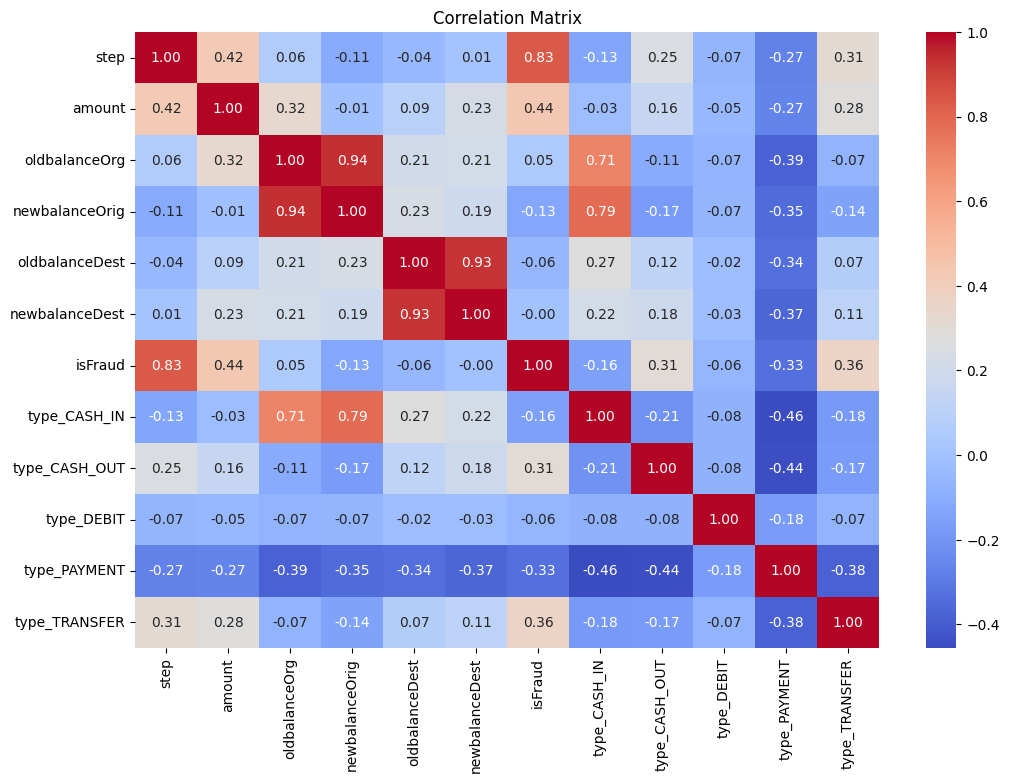

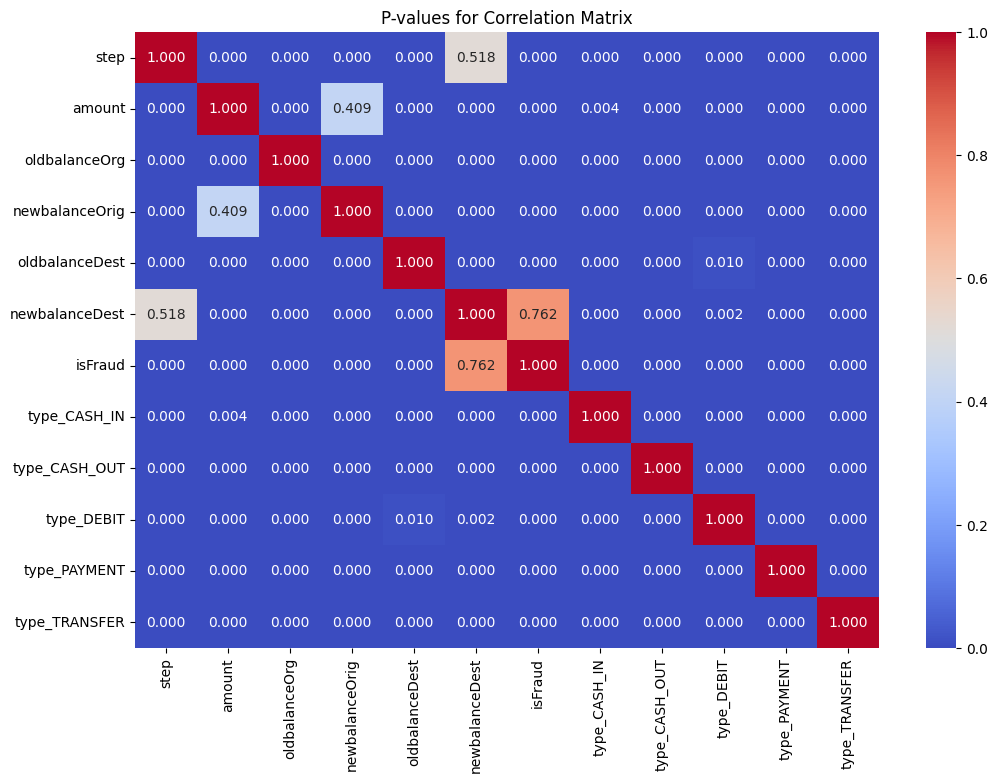

Removed Features due to High Multicollinearity: set()


In [16]:
#correlation matrix
'''corr_matrix = datawm.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()'''

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Compute Correlation Matrix
corr_matrix = datawm.corr()

# Function to Compute Correlation Matrix with P-values
def correlation_pvalues(df):
    cols = df.columns
    pval_matrix = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)

    for i in range(len(cols)):
        for j in range(i+1, len(cols)):  # Avoid duplicate computations
            corr, p_val = pearsonr(df[cols[i]], df[cols[j]])
            pval_matrix.iloc[i, j] = p_val
            pval_matrix.iloc[j, i] = p_val  # Symmetric matrix

    return pval_matrix

# Compute P-values for Correlation Matrix
p_values = correlation_pvalues(datawm)

# Display Heatmap of Correlation Matrix with P-values
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(p_values, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("P-values for Correlation Matrix")
plt.show()

# Drop Features with High Correlation and Insignificant P-values
threshold = 0.05  # Significance level
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8 and p_values.iloc[i, j] > threshold:
            col_to_remove = corr_matrix.columns[i]  # Choose one of the correlated features
            high_corr_features.add(col_to_remove)

# Reduce dataset by dropping high multicollinearity features
data = datawm.drop(columns=high_corr_features)

print("Removed Features due to High Multicollinearity:", high_corr_features)



In [17]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score

x = data.drop('isFraud',axis =1)
y = data['isFraud']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)

x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)

logreg = LogisticRegression(max_iter=1000,random_state=42)
logreg.fit(x_train_smote,y_train_smote)

y_pred = logreg.predict(x_test)
y_pred_proba = logreg.predict_proba(x_test,)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
accuracy__logreg = accuracy_score(y_test, y_pred)
print("accuracy Score:",accuracy__logreg)

append_model_result('Logistic Regression',accuracy__logreg,y_test,y_pred)

Confusion Matrix:
 [[1995    6]
 [  16  212]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.97      0.93      0.95       228

    accuracy                           0.99      2229
   macro avg       0.98      0.96      0.97      2229
weighted avg       0.99      0.99      0.99      2229

ROC AUC Score: 0.9913376645010827
accuracy Score: 0.9901301031852848


C:\Users\Vivek Menon\AppData\Local\Temp\ipykernel_2756\2604036266.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([model_metrics])], ignore_index=True)


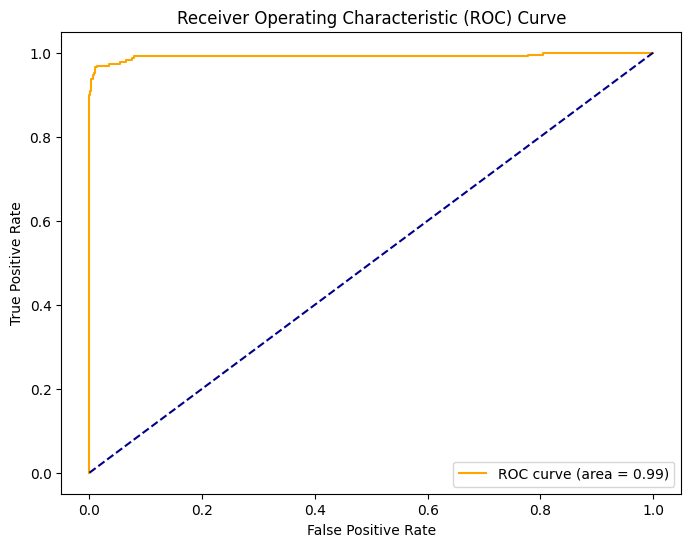

In [19]:
#ROC AUC curve

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C':[0.01,0.1,1,10,100],
    'penalty':['l1','l2'],
    'solver':['liblinear']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000),param_grid,cv=5, scoring='roc_auc')
grid_search.fit(x_train_smote, y_train_smote)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
y_pred_proba = best_model.predict_log_proba(x_test)[:,1] #probability estimates for class 1 alone, since data is very huge
print(classification_report(y_test,y_pred))
print("ROC AUC Score:", roc_auc_score(y_test,y_pred_proba))
accuracy__logreg = accuracy_score(y_test, y_pred)
print("accuracy Score:",accuracy__logreg)
append_model_result('Logistic Regression with HYP tuning',accuracy__logreg,y_test,y_pred)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.96      0.94      0.95       228

    accuracy                           0.99      2229
   macro avg       0.98      0.97      0.97      2229
weighted avg       0.99      0.99      0.99      2229

ROC AUC Score: 0.9926527964088131
accuracy Score: 0.9896814715118888


d:\python_311\Lib\site-packages\sklearn\linear_model\_logistic.py:1461: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


In [21]:
# XGB boost classifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, r2_score

xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train_smote, y_train_smote)
xgb_pred = xgb_model.predict(x_test)
accuracy_xgb = accuracy_score(y_test,xgb_pred)
print(f'Accuracy of XGBboost: {accuracy_xgb}')
print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))

append_model_result('XGboost',accuracy_xgb,y_test,xgb_pred)
#Model has high accuracy, hyper parameter tuning not required

Accuracy of XGBboost: 0.9982054733064154
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      0.99      0.99       228

    accuracy                           1.00      2229
   macro avg       1.00      0.99      1.00      2229
weighted avg       1.00      1.00      1.00      2229

[[2000    1]
 [   3  225]]


In [22]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_smote,y_train_smote)
rf_pred = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test,rf_pred)
print(f'Accuracy of random forest classifier: {accuracy_rf}')
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

append_model_result('Random Forest Classifier', accuracy_rf, y_test, rf_pred)

Accuracy of random forest classifier: 0.9964109466128309
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      0.97      0.98       228

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229

[[2000    1]
 [   7  221]]


In [23]:
#Hyper parameter tuning: Random forest classifier
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv = 5, scoring='accuracy')
grid_search_rf.fit(x_train_smote, y_train_smote)

best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_
rf_pred = best_rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test,rf_pred)
print(f'accuracy:{accuracy_rf}')
print(classification_report(y_test, rf_pred))
#No major difference in model evaluation metrics after applying hyperparameter tuning. This is because the model is already performing well with the default parameters.
append_model_result('Random Forest Classifier with HYP tuning', accuracy_rf, y_test, rf_pred)

accuracy:0.9964109466128309
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      0.97      0.98       228

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229



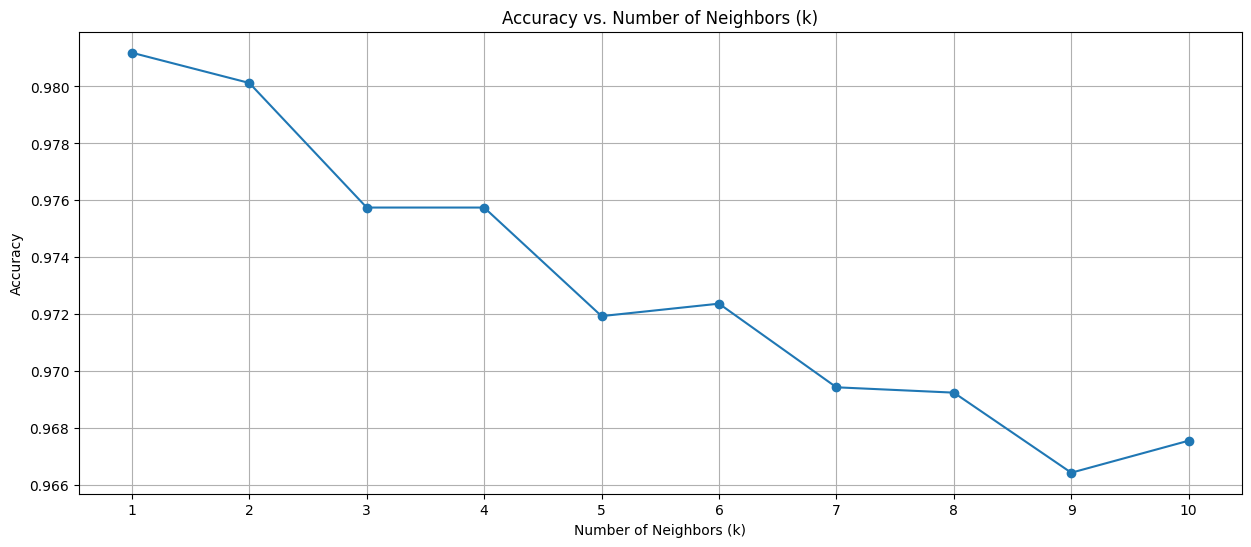

Best k: 1


In [27]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
def choose_k(x_train,y_train, x_test,y_test,max_k=10):
    k_values = list(range(1,max_k+1))
    accuracy_vals = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train,y_train)
        #y_pred = knn.predict(x_test)
        #accuracy = accuracy_score(y_test, y_pred)
        cv_scores = cross_val_score(knn, x_train, y_train,cv=5, scoring='accuracy') # k is choosen based on original test data rather than SMOTE'd data, for more reliable results
        accuracy_vals.append(cv_scores.mean()) # Since CV score represents an array of scores from each fold of cross validation, average is taken.
    # visualization fo accuracy ofdifferent k values
    plt.figure(figsize=(15, 6))
    plt.plot(k_values, accuracy_vals, marker='o', linestyle='-')
    plt.title('Accuracy vs. Number of Neighbors (k)')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()
    
    best_k = k_values[accuracy_vals.index(max(accuracy_vals))]
    return best_k
#Choosing best k
best_k_knn = choose_k(x_train_smote,y_train_smote, x_test, y_test)
print("Best k:", best_k_knn)

    

In [28]:
#KNN model
knn = KNeighborsClassifier(n_neighbors=best_k_knn)
knn.fit(x_train_smote,y_train_smote)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

append_model_result('KNN',accuracy,y_test, y_pred)

Accuracy: 0.9668012561686855
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2001
           1       0.79      0.92      0.85       228

    accuracy                           0.97      2229
   macro avg       0.89      0.94      0.92      2229
weighted avg       0.97      0.97      0.97      2229



In [29]:
#KNN hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(x_train_smote, y_train_smote)

best_params_knn = grid_knn.best_params_
best_knn = grid_knn.best_estimator_

y_pred_test = best_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test,y_pred_test)
print(f'Test set accuracy: {accuracy_knn}')

append_model_result('KNN with HYP tuning', accuracy_knn, y_test, y_pred)

Test set accuracy: 0.9685957828622701


                                      Model  Accuracy  Precision    Recall  \
0                       Logistic Regression  0.990130   0.982260  0.963413   
1       Logistic Regression with HYP tuning  0.989681   0.976331  0.967049   
2                                   XGboost  0.998205   0.997039  0.993171   
3                  Random Forest Classifier  0.996411   0.996004  0.984399   
4  Random Forest Classifier with HYP tuning  0.996411   0.996004  0.984399   
5                                       KNN  0.966801   0.890999  0.944590   
6                       KNN with HYP tuning  0.968596   0.890999  0.944590   
7                                       KNN  0.966801   0.890999  0.944590   
8                       KNN with HYP tuning  0.968596   0.890999  0.944590   

  F1 score  Support  F1-Score  
0      NaN   2229.0  0.972595  
1      NaN   2229.0  0.971631  
2      NaN   2229.0  0.995095  
3      NaN   2229.0  0.990113  
4      NaN   2229.0  0.990113  
5      NaN   2229.0  0.9154

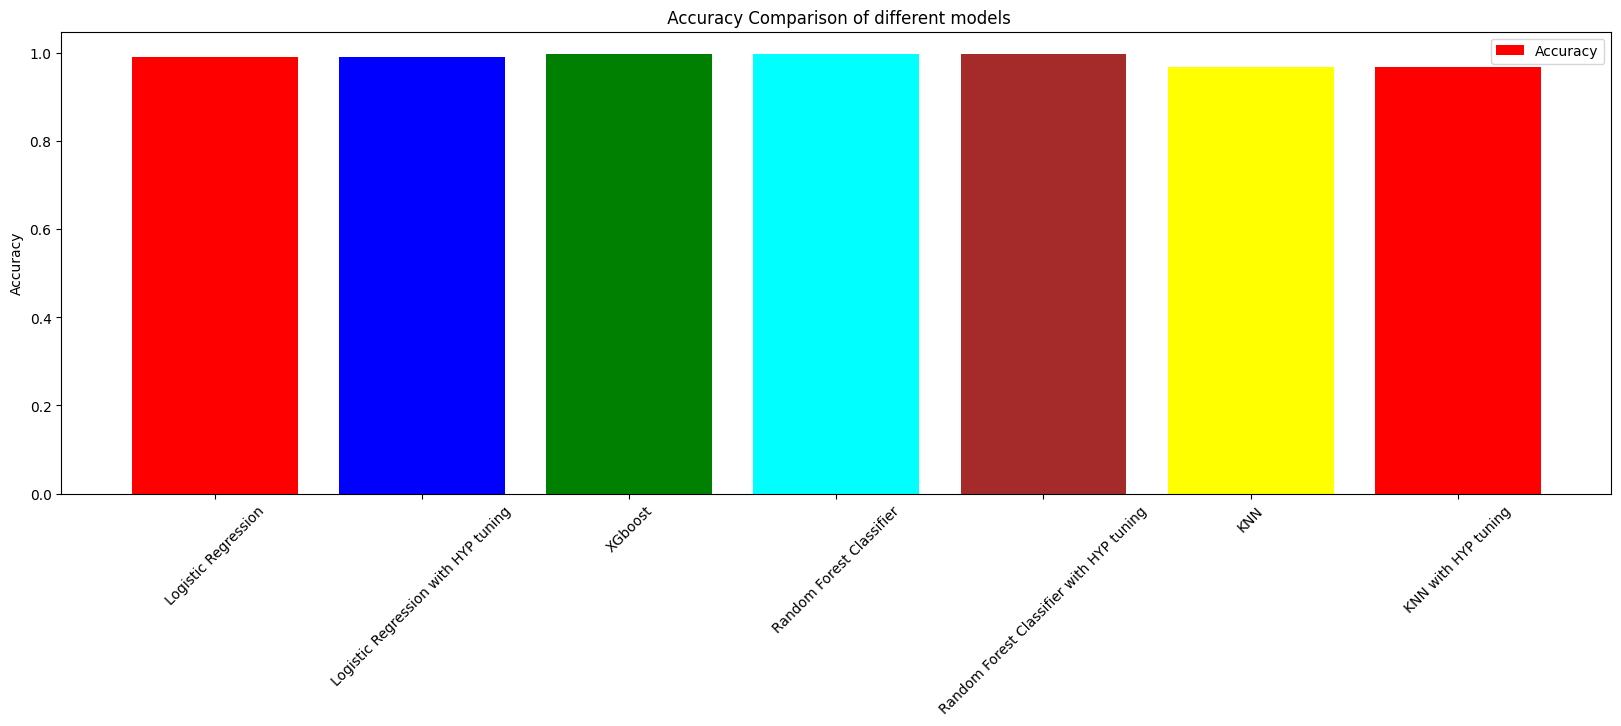

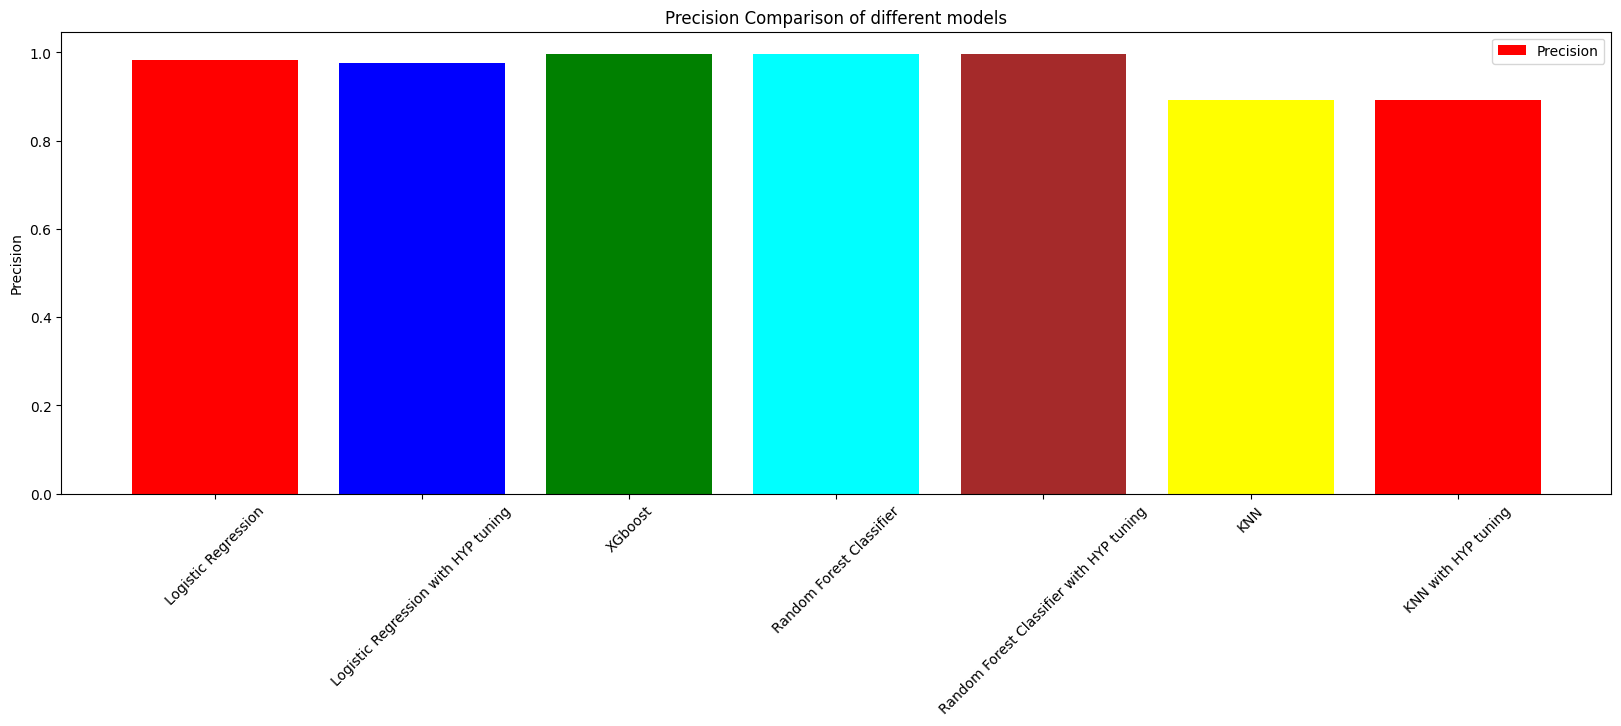

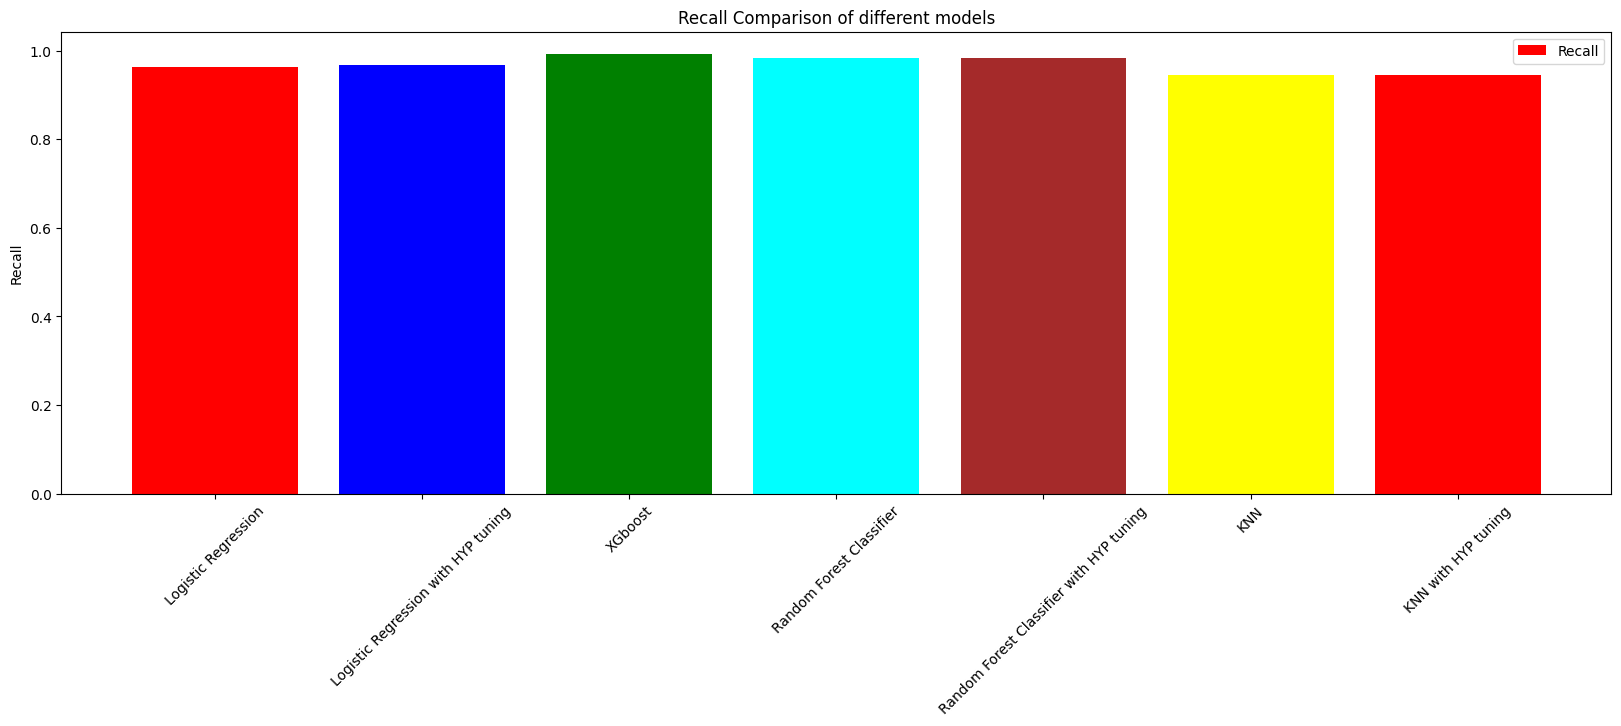

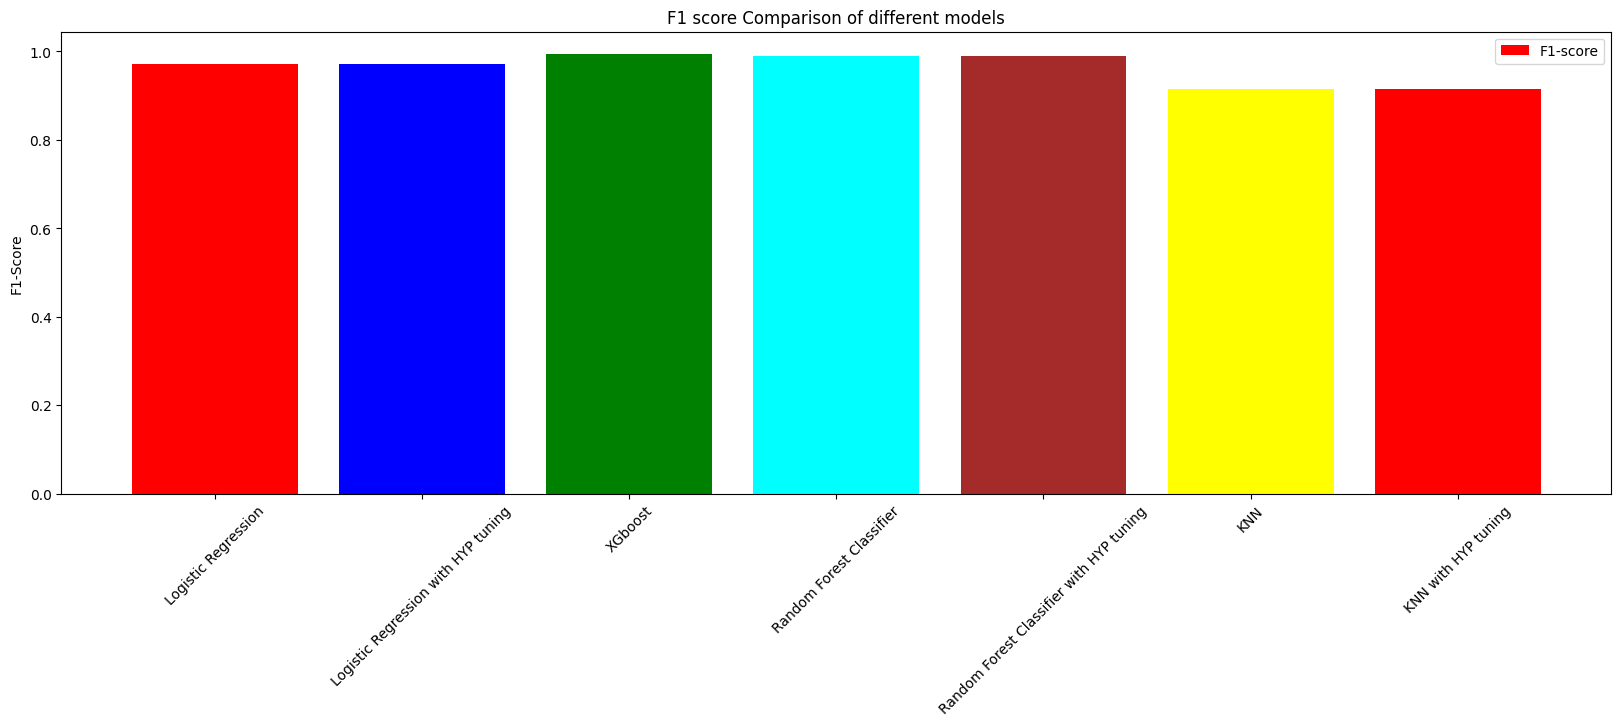

In [30]:
results_df.drop('F1 score',axis=1)
print(results_df)
plt.figure(figsize=(20, 6))  # Adjust figure size as needed
plt.bar(results_df['Model'], results_df['Accuracy'], label='Accuracy', color=['red','blue','green','cyan','brown','black','magenta','yellow'])
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.ylabel('Accuracy')
plt.legend()
plt.title(' Accuracy Comparison of different models')
plt.show()

plt.figure(figsize=(20, 6))  # Adjust figure size as needed
plt.bar(results_df['Model'], results_df['Precision'], label='Precision', color=['red','blue','green','cyan','brown','black','magenta','yellow'])
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.ylabel('Precision')
plt.legend()
plt.title('Precision Comparison of different models')
plt.show()

plt.figure(figsize=(20, 6))  # Adjust figure size as needed
plt.bar(results_df['Model'], results_df['Recall'], label='Recall', color=['red','blue','green','cyan','brown','black','magenta','yellow'])
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.ylabel('Recall')
plt.legend()
plt.title('Recall Comparison of different models')
plt.show()

plt.figure(figsize=(20, 6))  # Adjust figure size as needed
plt.bar(results_df['Model'], results_df['F1-Score'], label='F1-score', color=['red','blue','green','cyan','brown','black','magenta','yellow'])
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.ylabel('F1-Score')
plt.legend()
plt.title('F1 score Comparison of different models')
plt.show()
